In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime#, timedelta
from utils import db_utils
from utils import iefp_data_utils

In [13]:
conn = db_utils.connect_to_db()

In [14]:
movements = db_utils.read_table(conn,'cascais','movement')

In [ ]:
applications = db_utils.read_table(conn,'cascais','application')

In [6]:
print(movements.shape)
print(applications.shape)
print(applications.ute_id.unique().shape)

(870061, 8)
(125029, 61)
(65523,)


In [8]:
clean_apps = iefp_data_utils.clean_applications(applications,'2016-04-30')

In [9]:
clean_movs = iefp_data_utils.clean_movements(movements, clean_apps['table_index'])

In [10]:
clean_data = pd.merge(clean_movs,clean_apps,how='inner', left_on = ['ute_id','application_id'], right_on=['ute_id','table_index'])

In [11]:
print(clean_data.shape)
print(clean_data.application_id.unique().shape)
print(clean_data.ute_id.unique().shape)

(729811, 70)
(108663,)
(59941,)


In [24]:
clean_data.head()

,ute_id,movement_date,year_month,application_id,movement_type,movement_subtype,movement_result,movement_index,date,table_index,...,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,app_start_date
0,818,2013-02-18 00:00:00,201302,70845,application,DESEMPREGADO-NOVO EMPREGO,,70845,2013-02-01,70845,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01
1,818,,201304,70845,convocation,OFERTA,APRESENTADO,119828,2013-04-01,70845,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01
2,818,,201305,70845,interview,,RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃ...,85260,2013-05-01,70845,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01
3,818,,201306,70845,convocation,OFERTA,NÃO APRESENTADO,125724,2013-06-01,70845,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01
4,818,,201403,70845,convocation,OFERTA,NÃO COMPARECEU INJUSTIFICADAMENTE,147876,2014-03-01,70845,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01


In [25]:
mov_counts = clean_data.groupby(['ute_id','application_id']).movement_type.value_counts().unstack().reset_index()
mov_counts.head()

movement_type,ute_id,application_id,application,cancellation,category_change,convocation,intervention,interview
0,818,70845,1.0,1.0,NaN,9.0,2.0,2.0
1,820,22603,1.0,1.0,1.0,NaN,2.0,1.0
2,820,61013,1.0,1.0,NaN,3.0,1.0,1.0
3,832,1930,1.0,NaN,NaN,4.0,1.0,1.0
4,832,9174,1.0,1.0,NaN,1.0,NaN,NaN


In [26]:
#Add column to show how many months after the application the movement occurred
def difftime_in_months(timeA,timeB):
    return (timeA-timeB)/np.timedelta64(1, 'M')

clean_data['months_after_app'] = difftime_in_months(clean_data['date'],clean_data['app_start_date'])
clean_data.head()

,ute_id,movement_date,year_month,application_id,movement_type,movement_subtype,movement_result,movement_index,date,table_index,...,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,app_start_date,months_after_app
0,818,2013-02-18 00:00:00,201302,70845,application,DESEMPREGADO-NOVO EMPREGO,,70845,2013-02-01,70845,...,None,None,None,None,None,2.0,2.0,None,2013-02-01,0.000000
1,818,,201304,70845,convocation,OFERTA,APRESENTADO,119828,2013-04-01,70845,...,None,None,None,None,None,2.0,2.0,None,2013-02-01,1.938438
2,818,,201305,70845,interview,,RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃ...,85260,2013-05-01,70845,...,None,None,None,None,None,2.0,2.0,None,2013-02-01,2.924085
3,818,,201306,70845,convocation,OFERTA,NÃO APRESENTADO,125724,2013-06-01,70845,...,None,None,None,None,None,2.0,2.0,None,2013-02-01,3.942586
4,818,,201403,70845,convocation,OFERTA,NÃO COMPARECEU INJUSTIFICADAMENTE,147876,2014-03-01,70845,...,None,None,None,None,None,2.0,2.0,None,2013-02-01,12.911969


In [27]:
#Check whether application was cancelled before 12 months
def has_cancellation_before_n_months(x,n=12):
    return np.any((x['movement_type'].isin(['cancellation'])) & (x['months_after_app'] < n))

#Check whether application was placement before 12 months
def has_placement_before_n_months(x,n=12):
    return np.any((x['movement_result'].isin(['ADMITIDO / COLOCADO'])) & (x['months_after_app'] < n))

#Label application as LTU/Non-LTU using LTU criteria
def is_ltu(app_ltu_crit):
    return (~((app_ltu_crit['cancelled_before_12mo']) | (app_ltu_crit['placed_before_12mo'])))

#Compute LTU criteria for application
def get_ltu_criteria(application_movs):
    return pd.Series({'cancelled_before_12mo': has_cancellation_before_n_months(application_movs),
                      'placed_before_12mo':has_placement_before_n_months(application_movs)})

apps_ltu = clean_data.groupby(['ute_id','application_id']).apply(get_ltu_criteria).reset_index()
apps_ltu['ltu'] = is_ltu(apps_ltu)
apps_ltu.head()

,ute_id,application_id,cancelled_before_12mo,placed_before_12mo,ltu
0,818,70845,False,False,True
1,820,22603,False,False,True
2,820,61013,True,False,False
3,832,1930,False,True,False
4,832,9174,True,False,False


In [28]:
model_matrix = apps_ltu.merge(mov_counts, on=['ute_id','application_id']).merge(clean_apps,left_on=['ute_id','application_id'], right_on=['ute_id','table_index'])
model_matrix.head(10)

,ute_id,application_id,cancelled_before_12mo,placed_before_12mo,ltu,application,cancellation,category_change,convocation,intervention,...,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,app_start_date
0,818,70845,False,False,True,1.0,1.0,NaN,9.0,2.0,...,None,None,None,None,None,None,2.0,2.0,None,2013-02-01
1,820,22603,False,False,True,1.0,1.0,1.0,NaN,2.0,...,None,None,None,None,None,None,2.0,None,None,2009-03-01
2,820,61013,True,False,False,1.0,1.0,NaN,3.0,1.0,...,None,None,None,None,3.0,PAS,2.0,2.0,None,2012-05-01
3,832,1930,False,True,False,1.0,NaN,NaN,4.0,1.0,...,None,None,None,None,None,None,1.0,None,None,2007-03-01
4,832,9174,True,False,False,1.0,1.0,NaN,1.0,NaN,...,None,None,None,None,None,None,1.0,None,None,2007-12-01
5,836,8464,True,False,False,1.0,1.0,1.0,3.0,1.0,...,None,None,None,None,None,None,0.0,None,None,2007-11-01
6,836,45665,True,False,False,1.0,1.0,NaN,1.0,NaN,...,None,None,None,None,None,None,0.0,None,None,2011-02-01
7,836,50118,False,False,True,1.0,1.0,2.0,9.0,6.0,...,None,None,None,None,None,None,0.0,None,None,2011-07-01
8,836,109053,False,False,True,1.0,NaN,NaN,4.0,1.0,...,None,None,None,None,2.0,PAS,0.0,0.0,2011-02-15 00:00:00,2016-01-01
9,848,57808,True,False,False,1.0,1.0,NaN,NaN,NaN,...,None,None,None,None,None,None,0.0,None,None,2012-02-01


In [29]:
#LTU Proportion in the dataset
ltu_proportions = model_matrix.groupby('ltu').application_id.count()/model_matrix.shape[0]
ltu_proportions.reset_index(name='proportion')

,ltu,proportion
0,False,0.693299
1,True,0.306701


In [31]:
model_matrix.to_csv('unemployment_data_matrix.csv', index=False, encoding='utf8')

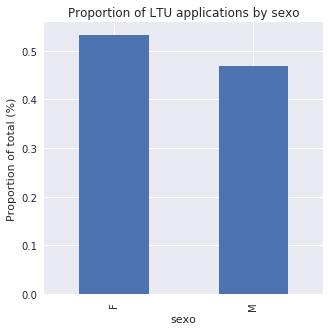

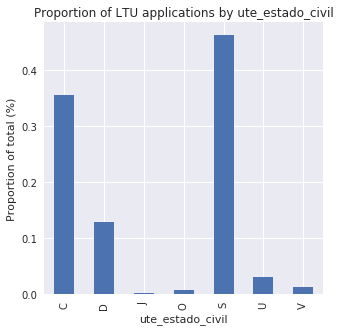

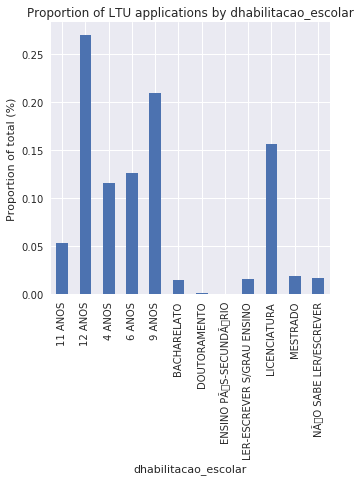

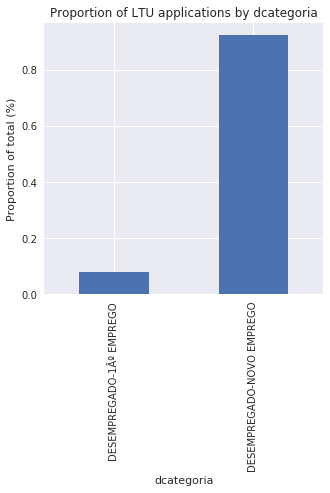

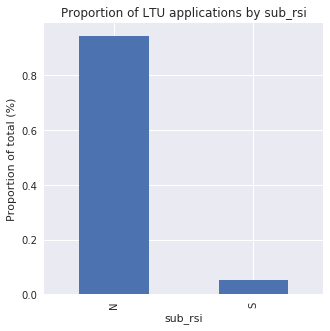

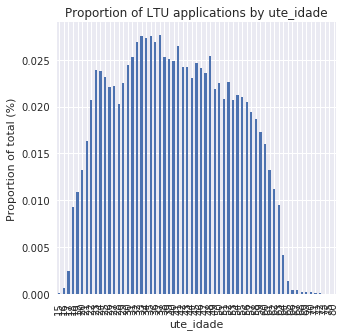

In [32]:
def get_proportions_bar_chart(dataframe, variable):
    interv_by_var = dataframe.groupby([variable]).ute_id.count()/dataframe.shape[0]
    interv_by_var = interv_by_var.reset_index(name='proportion')
    
    plt.figure()
    return interv_by_var.plot(
        x=variable,
        y='proportion',
        kind='bar',
        legend=False,
        figsize=(5,5),
        title="Proportion of LTU applications by " + 
        variable).set_ylabel('Proportion of total (%)')


demographic_variables = ['sexo', 'ute_estado_civil', 'dhabilitacao_escolar', 'dcategoria', 'sub_rsi', 'ute_idade']

for variable in demographic_variables:
    get_proportions_bar_chart(model_matrix[model_matrix['ltu']],variable)
    
#ltu_by_var = apps_data[apps_data['ltu']].groupby(['sexo']).ute_id.count()/apps_data[apps_data['ltu']].shape[0]
#ltu_by_var.reset_index(name='proportion')

